In [2]:
import pandas as pd
import requests

import time
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import  kaleido

pd.set_option('display.max_columns', None)


## Data Scraping

In [29]:
test_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2012-13&SeasonType=Regular%20Season&StatCategory=PTS"

In [30]:
r = requests.get(url=test_url).json()

In [31]:
table_headers = r['resultSet']['headers']

In [32]:
pd.DataFrame(r['resultSet']['rowSet'], columns = table_headers)

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,...,640,374,116,105,280,143,2280,2462,1.34,0.41
1,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,...,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,...,610,551,129,67,226,110,2036,2446,2.44,0.57
3,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,...,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,...,460,171,52,32,175,205,1920,1553,0.98,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,203130,463,Darius Johnson-Odom,1610612747,LAL,4,6,0,4,0.000,...,4,1,0,0,0,0,0,1,0.00,0.00
464,2545,463,Darko Milicic,1610612738,BOS,1,5,0,1,0.000,...,1,0,0,0,2,1,0,-2,0.00,0.00
465,202458,463,Justin Dentmon,1610612742,DAL,2,4,0,2,0.000,...,0,0,0,0,0,0,0,-2,0.00,0.00
466,2679,463,Matt Carroll,1610612766,CHA,1,6,0,0,0.000,...,0,1,0,0,0,1,0,1,0.00,0.00


In [33]:
temp_df1 = pd.DataFrame(r['resultSet']['rowSet'], columns = table_headers)
temp_df2 = pd.DataFrame({'Year':['2012-13' for i in range(len(temp_df1))],
                         'Season_type':['Regular%20Season' for i in range(len(temp_df1))]})

temp_df3 = pd.concat([temp_df2, temp_df1], axis = 1)
temp_df3

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,...,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,...,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,...,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,...,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,...,460,171,52,32,175,205,1920,1553,0.98,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2012-13,Regular%20Season,203130,463,Darius Johnson-Odom,1610612747,LAL,4,6,0,...,4,1,0,0,0,0,0,1,0.00,0.00
464,2012-13,Regular%20Season,2545,463,Darko Milicic,1610612738,BOS,1,5,0,...,1,0,0,0,2,1,0,-2,0.00,0.00
465,2012-13,Regular%20Season,202458,463,Justin Dentmon,1610612742,DAL,2,4,0,...,0,0,0,0,0,0,0,-2,0.00,0.00
466,2012-13,Regular%20Season,2679,463,Matt Carroll,1610612766,CHA,1,6,0,...,0,1,0,0,0,1,0,1,0.00,0.00


In [34]:
del temp_df1, temp_df2, temp_df3

In [35]:
df_cols = ['Year', 'Season_type'] + table_headers

In [36]:
headers = {
    'Accept': '*/*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
    'Host': 'stats.nba.com',
    'Origin': 'https://www.nba.com',
    'Referer': 'https://www.nba.com/',
    'Sec-Ch-Ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': "Windows",
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'
}

In [39]:
api_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season='+y+'&SeasonType='+s+'&StatCategory=PTS"
r = requests.get(url=api_url, headers = headers).json()

In [41]:
df= pd.DataFrame(columns=df_cols)
season_types = ['Regular%20Season', 'Playoffs']
years = ['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

begin_loop = time.time()

for y in years:
    for s in season_types:
        api_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season='+y+'&SeasonType='+s+'&StatCategory=PTS'
        r = requests.get(url=api_url, headers = headers).json()
        temp_df1 = pd.DataFrame(r['resultSet']['rowSet'], columns = table_headers)
        temp_df2 = pd.DataFrame({'Year':[y for i in range(len(temp_df1))],
                         'Season_type':[s for i in range(len(temp_df1))]})
        temp_df3 = pd.concat([temp_df2, temp_df1], axis = 1)
        df = pd.concat([df, temp_df3], axis = 0)
        print(f'Finished scraping data for the {y} {s}.')
        lag = np.random.uniform(low=5,high=40)
        print(f'...waiting {round(lag,1)} seconds')
        time.sleep(lag)

print(f'Process completed Total run time: {round(time.time() - begin_loop)/60,2}')

df.to_excel('nba_player_data.xlsx', index=False)

Finished scraping data for the 2012-13 Regular%20Season.
...waiting 29.1 seconds
Finished scraping data for the 2012-13 Playoffs.
...waiting 39.9 seconds
Finished scraping data for the 2013-14 Regular%20Season.
...waiting 13.3 seconds
Finished scraping data for the 2013-14 Playoffs.
...waiting 9.1 seconds
Finished scraping data for the 2014-15 Regular%20Season.
...waiting 23.9 seconds
Finished scraping data for the 2014-15 Playoffs.
...waiting 17.2 seconds
Finished scraping data for the 2015-16 Regular%20Season.
...waiting 35.7 seconds
Finished scraping data for the 2015-16 Playoffs.
...waiting 39.4 seconds
Finished scraping data for the 2016-17 Regular%20Season.
...waiting 5.8 seconds
Finished scraping data for the 2016-17 Playoffs.
...waiting 11.7 seconds
Finished scraping data for the 2017-18 Regular%20Season.
...waiting 21.4 seconds
Finished scraping data for the 2017-18 Playoffs.
...waiting 36.5 seconds
Finished scraping data for the 2018-19 Regular%20Season.
...waiting 26.9 secon

## Data Cleaning/Preparing

In [3]:
data = pd.read_excel('nba_player_data.xlsx')
data.shape


(8049, 30)

In [4]:
data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
257,2012-13,Regular%20Season,203080,257,Thomas Robinson,1610612745,HOU,70,1056,138,321,0.430,0,1,0.000,57,109,0.523,122,193,315,46,41,26,88,124,333,438,0.52,0.47
7306,2022-23,Regular%20Season,1627759,14,Jaylen Brown,1610612738,BOS,67,2405,679,1383,0.491,163,487,0.335,263,344,0.765,78,381,459,232,75,26,197,172,1784,1594,1.18,0.38
7891,2022-23,Playoffs,1628969,60,Mikal Bridges,1610612751,BKN,4,157,33,77,0.429,10,25,0.400,18,23,0.783,2,19,21,16,2,2,8,5,94,78,2.00,0.25
1435,2014-15,Regular%20Season,2590,74,Mo Williams,1610612766,CHA,68,1980,341,860,0.397,119,348,0.342,163,187,0.872,22,152,174,424,46,14,172,162,964,907,2.46,0.27
985,2013-14,Regular%20Season,2570,309,Kendrick Perkins,1610612760,OKC,62,1207,87,193,0.451,0,1,0.000,37,67,0.552,82,223,305,67,26,32,90,177,211,415,0.74,0.29
3158,2016-17,Regular%20Season,1627782,406,Wayne Selden,1610612763,MEM,14,236,25,58,0.431,7,28,0.250,14,22,0.636,1,15,16,13,6,1,12,18,71,54,1.08,0.50
5553,2019-20,Playoffs,203504,79,Trey Burke,1610612742,DAL,6,156,30,59,0.508,8,17,0.471,6,10,0.600,2,17,19,12,8,2,6,14,74,76,2.00,1.33
5642,2019-20,Playoffs,203585,166,Rodney McGruder,1610612746,LAC,5,16,3,5,0.600,2,3,0.667,0,0,0.000,1,3,4,2,0,0,0,0,8,12,0.00,0.00
1010,2013-14,Regular%20Season,203115,334,Will Barton,1610612757,POR,41,387,65,156,0.417,10,33,0.303,26,32,0.813,16,58,74,33,9,7,18,31,166,174,1.83,0.50
3258,2016-17,Playoffs,101108,20,Chris Paul,1610612746,LAC,7,260,67,135,0.496,14,38,0.368,29,33,0.879,4,31,35,69,12,1,19,24,177,203,3.63,0.63


In [5]:
data.isna().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

In [6]:
data.drop(columns=['RANK', 'EFF'], inplace=True)

In [7]:
data['season_start_year'] = data['Year'].str[:4].astype(int)

In [8]:
data['TEAM'].replace(to_replace=['NOP','NOH'], value ='NO', inplace=True)

In [9]:
data['Season_type'].replace('Regular%20Season', 'RS', inplace=True)

In [10]:
rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [11]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

In [12]:
total_cols = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Data Analysis

### Which player stats are correlated with each other?

C:\Users\Rajan Patel\AppData\Local\Temp\ipykernel_11592\2717778191.py:18: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



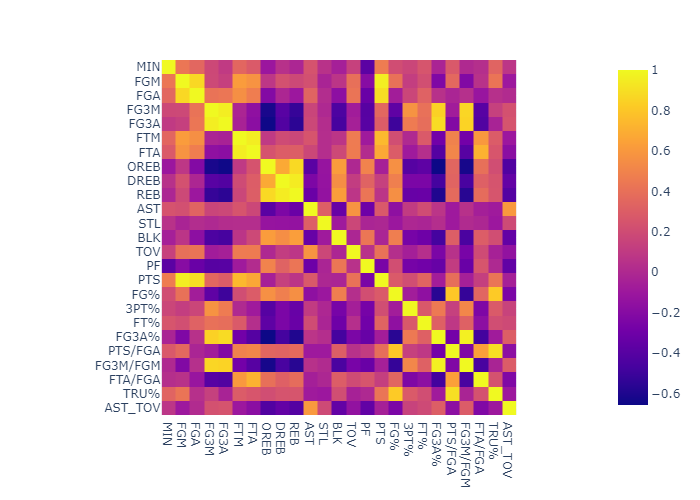

In [32]:
data_per_min = data.groupby(['PLAYER', 'PLAYER_ID', 'Year'])[total_cols].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col]/data_per_min['MIN']

data_per_min['FG%'] = data_per_min['FGM']/data_per_min['FGA']
data_per_min['3PT%'] = data_per_min['FG3M']/data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM']/data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A']/data_per_min['FGA']
data_per_min['PTS/FGA'] = data_per_min['PTS']/data_per_min['FGA']
data_per_min['FG3M/FGM'] = data_per_min['FG3M']/data_per_min['FGM']
data_per_min['FTA/FGA'] = data_per_min['FTA']/data_per_min['FGA']
data_per_min['TRU%'] = 0.5*data_per_min['PTS']/(data_per_min['FGA']+0.475*data_per_min['FTA'])
data_per_min['AST_TOV'] = data_per_min['AST']/data_per_min['TOV']

data_per_min = data_per_min[data_per_min['MIN'] >=50]
data_per_min.drop(columns='PLAYER_ID', inplace = True)

fig = px.imshow(data_per_min.corr())
fig.show('png')



- 3PT made and FG% negatively correlated
- FGA and FTA positive
- Minutes played and fouls negative
- TOs and assists positive

In [14]:
(data_per_min['MIN'] >=50).mean()

1.0

### How are minutes played distributed?

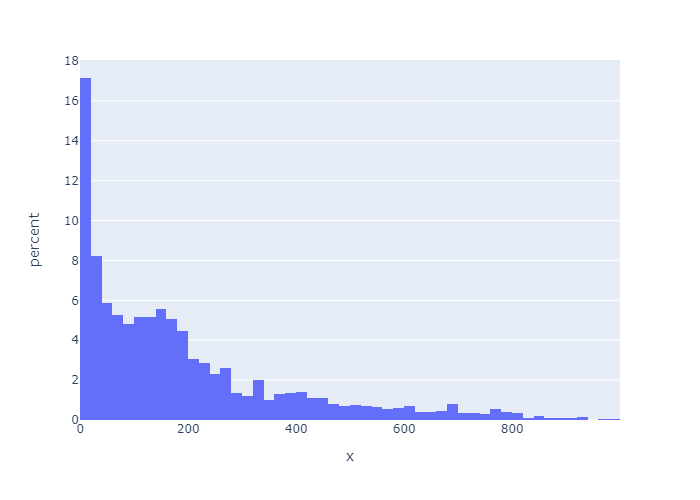

In [30]:
fig = px.histogram(x=playoffs_df['MIN'], histnorm='percent')
fig.show('png')

In [16]:
def hist_data(df=rs_df, min_MIN=0, min_GP=0):
    return df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'MIN']/\
    df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'GP']

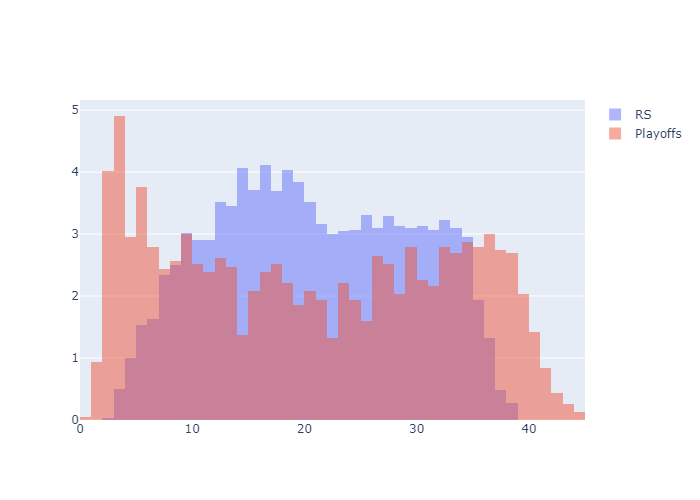

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data(rs_df,50,5), histnorm='percent', name='RS',
                           xbins={'start':0,'end':46,'size':1}))
fig.add_trace(go.Histogram(x=hist_data(playoffs_df,5,1), histnorm='percent',
                           name='Playoffs', xbins={'start':0,'end':46,'size':1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show('png')

There are tighter rotation during the playoffs than the regular season

In [18]:
((hist_data(playoffs_df,5,1)>=12)&(hist_data(playoffs_df,5,1)<=34)).mean()

# 49% of NBA players play between 12 and 34 minutes in the playoffs

0.4904993371630579

In [19]:
((hist_data(rs_df,5,1)>=12)&(hist_data(rs_df,5,1)<=34)).mean()

# 70% of NBA players play between 12 and 34 minutes in the reg.season

0.7029281277728483

### How has the game changed over time?

In [20]:
change_df = data.groupby('season_start_year')[total_cols].sum().reset_index()
change_df['POSS_est'] = change_df['FGA']-change_df['OREB']+change_df['TOV']+0.44*change_df['FTA']
change_df = change_df[list(change_df.columns[0:2]) + ['POSS_est']+list(change_df.columns[2:-1])]

change_df['FG%'] = change_df['FGM']/change_df['FGA']
change_df['3PT%'] = change_df['FG3M']/change_df['FG3A']
change_df['FT%'] = change_df['FTM']/change_df['FTA']
change_df['AST%'] = change_df['AST']/change_df['FGM']
change_df['FG3A%'] = change_df['FG3A']/change_df['FGA']
change_df['PTS/FGA'] = change_df['PTS']/change_df['FGA']
change_df['FG3M/FGM'] = change_df['FG3M']/change_df['FGM']
change_df['FTA/FGA'] = change_df['FTA']/change_df['FGA']
change_df['TRU%'] = 0.5*change_df['PTS']/(change_df['FGA']+0.475*change_df['FTA'])
change_df['AST_TOV'] = change_df['AST']/change_df['TOV']

change_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,635884,248201.92,97235,215105,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403,0.452035,0.357777,0.752755,0.593346,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,638373,254032.80,99251,218411,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201,0.454423,0.359601,0.756472,0.580921,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,634546,253004.12,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,636391,258064.80,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,632482,258443.80,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,633425,260904.52,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,634231,268739.84,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,552262,234384.64,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,562518,235759.48,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,635572,264004.96,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


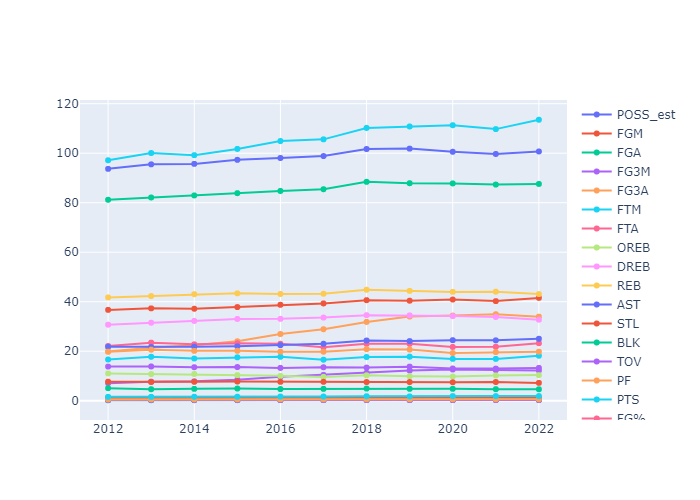

In [28]:
# Per 48 Minutes played

change_per48_df = change_df.copy()

for col in change_per48_df.columns[2:18]:
    change_per48_df[col] = change_per48_df[col]/change_per48_df['MIN']*48*5

change_per48_df.drop(columns='MIN', inplace=True)
change_per48_df

fig = go.Figure()
for col in change_per48_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per48_df['season_start_year'],
                             y=change_per48_df[col], name=col))

fig.show('png')


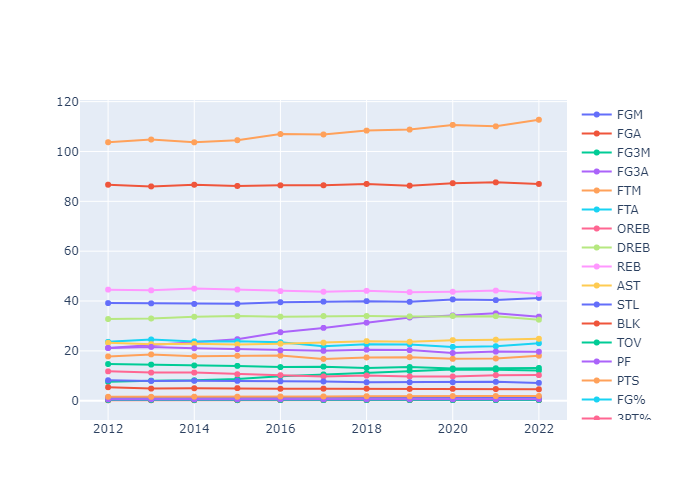

In [27]:
# Per 100 Possessions

change_per100_df = change_df.copy()
change_per100_df

for col in change_per100_df.columns[3:18]:
    change_per100_df[col] = (change_per100_df[col] / change_per100_df["POSS_est"]) * 100

change_per100_df.drop(columns=["MIN", 'POSS_est'], inplace=True)
change_per100_df

fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(
        go.Scatter(
            x=change_per100_df["season_start_year"], y=change_per100_df[col], name=col
        )
    )

fig.show('png')

- Increase offensive efficiency over time (TRU%, PTS, AST%)
- Slight decline in blocks, could be attributed to lesser close range shots compared to long distance
- Decline in fouls, interesting because of how much foul baiting happens around the league

### Comparing Regular season to PLayoffs

In [23]:
rs_change_df = rs_df.groupby('season_start_year')[total_cols].sum().reset_index()
playoffs_change_df = playoffs_df.groupby('season_start_year')[total_cols].sum().reset_index()

for i in [rs_change_df,playoffs_change_df]:
    i['POSS_est'] = i['FGA']-i['OREB']+i['TOV']+0.44*i['FTA']
    i['POSS_per_48'] = (i['POSS_est']/i['MIN'])*48*5

    i['FG%'] = i['FGM']/i['FGA']
    i['3PT%'] = i['FG3M']/i['FG3A']
    i['FT%'] = i['FTM']/i['FTA']
    i['AST%'] = i['AST']/i['FGM']
    i['FG3A%'] = i['FG3A']/i['FGA']
    i['PTS/FGA'] = i['PTS']/i['FGA']
    i['FG3M/FGM'] = i['FG3M']/i['FGM']
    i['FTA/FGA'] = i['FTA']/i['FGA']
    i['TRU%'] = 0.5*i['PTS']/(i['FGA']+0.475*i['FTA'])
    i['AST_TOV'] = i['AST']/i['TOV']

    for col in total_cols:
        i[col] = 100*i[col]/i['POSS_est']
    i.drop(columns=['MIN', 'POSS_est'], inplace=True)

rs_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,39.270953,86.735365,7.573088,21.109396,17.662937,23.460955,11.812003,32.747162,44.559165,23.410189,8.250677,5.430183,14.753819,20.983773,103.777931,93.838988,0.452767,0.358754,0.752865,0.596120,0.243377,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,39.077222,85.994401,8.025279,22.311911,18.477433,24.441006,11.307161,32.985187,44.292348,22.799223,7.958311,4.883231,14.558717,21.448058,104.657155,95.735469,0.454416,0.359686,0.756001,0.583440,0.259458,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,38.900086,86.650240,8.135183,23.240912,17.771371,23.688136,11.288515,33.604208,44.892723,22.846798,8.021797,4.972578,14.215495,20.960953,103.706727,95.659492,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,38.926558,86.096120,8.670900,24.515476,17.996886,23.782176,10.603882,33.942436,44.546317,22.690502,7.988086,5.045782,14.043605,20.630890,104.520902,97.493488,0.452129,0.353691,0.756738,0.582905,0.284745,1.214002,0.222750,0.276228,0.536595,1.615718
4,2016,39.516445,86.434227,9.769173,27.323490,18.052073,23.388341,10.257879,33.777035,44.034914,22.896756,7.795428,4.800256,13.532781,20.136476,106.854135,98.151085,0.457185,0.357538,0.771841,0.579423,0.316119,1.236248,0.247218,0.270591,0.547724,1.691948
5,2017,39.782703,86.439951,10.536996,29.127708,16.700692,21.772593,9.754285,33.953813,43.708098,23.339648,7.750757,4.836313,13.734393,19.940143,106.803093,98.979263,0.460235,0.361752,0.767051,0.586678,0.336970,1.235576,0.264864,0.251881,0.551772,1.699358
6,2018,40.060963,86.993122,11.081358,31.213318,17.241016,22.498864,10.089962,33.952838,44.042800,23.975453,7.443993,4.830132,13.197341,20.384863,108.444300,101.847754,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,39.741774,86.378550,11.875237,33.176460,17.368831,22.473502,9.798838,33.803237,43.602075,23.716035,7.438668,4.765339,13.531948,20.205627,108.727615,102.071250,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,40.637565,87.183600,12.520406,34.156188,16.730698,21.517093,9.692393,33.988197,43.680589,24.457861,7.466502,4.804198,13.041271,19.021868,110.526234,100.810750,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,40.444286,87.713064,12.383811,35.022979,16.859678,21.766578,10.288949,33.966643,44.255592,24.540976,7.597520,4.692395,12.998590,19.550702,110.132061,99.871250,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972


In [24]:
# Percent change from RS to Playoffs

comp_change_df = round(100*(playoffs_change_df - rs_change_df)/rs_change_df,3)
comp_change_df['season_start_year'] = list(range(2012,2023))
comp_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,-3.817,-1.272,0.959,5.262,10.247,10.479,-4.331,1.607,0.033,-11.127,-7.870,-3.952,-3.323,14.087,-1.075,-2.632,-2.578,-4.088,-0.210,-7.600,6.618,0.199,4.966,11.902,-1.140,-8.073
1,2013,-0.277,-0.301,6.989,7.352,9.133,8.175,-2.923,0.343,-0.491,-6.880,-4.594,-4.440,-6.531,9.935,1.942,-3.558,0.024,-0.338,0.886,-6.621,7.676,2.249,7.286,8.501,1.226,-0.373
2,2014,-2.737,0.266,11.046,12.980,4.844,8.464,0.314,3.983,3.060,-2.120,-2.726,10.739,-7.577,7.261,-0.357,0.549,-2.995,-1.712,-3.337,0.634,12.681,-0.621,14.171,8.176,-1.546,5.905
3,2015,-1.639,1.134,10.359,10.117,2.449,3.754,3.511,0.314,1.075,-8.193,-3.999,2.971,-7.096,6.995,0.060,-2.678,-2.741,0.220,-1.257,-6.663,8.883,-1.061,12.198,2.591,-1.358,-1.181
4,2016,0.316,-0.384,10.680,9.586,5.468,4.854,-2.594,-2.346,-2.404,-0.377,-0.318,0.412,-3.207,6.163,2.134,-1.399,0.703,0.998,0.586,-0.691,10.008,2.527,10.331,5.257,1.917,2.924
5,2017,-1.036,-0.020,2.286,5.358,5.549,5.813,-3.358,1.676,0.552,-4.159,-3.315,2.308,-6.315,6.690,0.322,-2.014,-1.016,-2.916,-0.250,-3.156,5.379,0.341,3.356,5.834,-0.280,2.301
6,2018,-4.331,-0.476,2.026,5.065,11.887,9.381,0.737,2.060,1.757,-4.422,-5.300,0.441,-3.336,8.363,-1.103,-2.406,-3.874,-2.893,2.291,-0.094,5.567,-0.630,6.645,9.904,-1.696,-1.123
7,2019,-2.298,-1.639,10.056,9.412,8.292,6.206,-10.140,1.575,-1.058,-3.600,-5.432,-10.645,-1.416,7.634,0.743,-2.870,-0.670,0.588,1.964,-1.333,11.235,2.422,12.644,7.975,1.531,-2.215
8,2020,0.620,1.445,1.480,2.218,6.434,5.243,4.155,0.363,1.204,-8.586,-8.981,-6.774,-10.378,9.637,1.598,-3.038,-0.813,-0.722,1.132,-9.150,0.762,0.151,0.855,3.744,-0.241,1.999
9,2021,-3.008,-1.845,1.867,1.512,8.047,6.628,-6.394,-1.246,-2.443,-4.127,-4.031,-0.146,2.504,12.789,-0.768,-2.734,-1.186,0.350,1.331,-1.153,3.419,1.097,5.026,8.632,0.185,-6.468


 - More 3Pt in playoffs
 - Pace of play slow down (POSS_per_48)
 - Assists down (more iso ball in playoffs)
 - More fouls in playoffs -> more FTs

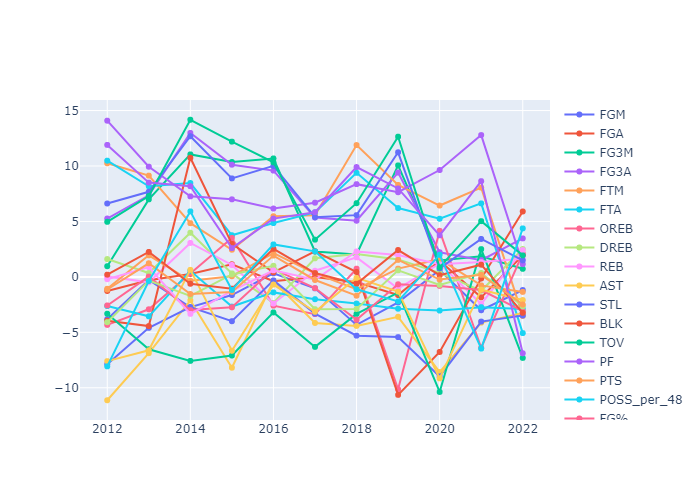

In [25]:
fig = go.Figure()
for col in comp_change_df.columns[1:]:
    fig.add_trace(
        go.Scatter(
            x=comp_change_df["season_start_year"], y=comp_change_df[col], name=col
        )
    )

fig.show('png')